In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
log = pd.read_csv('stimlog.txt', sep='\t', names=['Time', 'Level', 'Msg'])
log

,Time,Level,Msg
0,3.5666,WARNING,Monitor specification not found. Creating a te...
1,3.5973,WARNING,User requested fullscreen with size [1024 768...
2,5.0904,EXP,Created leftCard = ImageStim(__class__=<class ...
3,5.1311,EXP,Created middleCard = ImageStim(__class__=<clas...
4,5.1711,EXP,Created rightCard = ImageStim(__class__=<class...
...,...,...,...
714,25.0818,EXP,middleCard: autoDraw = False
715,25.1318,EXP,leftCard: autoDraw = False
716,25.1318,EXP,rightCard: autoDraw = False
717,25.1651,EXP,middleCard: autoDraw = True


In [12]:
exp = log[log.Level == 'EXP ']
left = exp[exp.Msg.str.contains('leftCard: ')].Time.values
middle = exp[exp.Msg.str.contains('middleCard: ')].Time.values
right = exp[exp.Msg.str.contains('rightCard: ')].Time.values
left[:5]

array([5.2982, 5.4148, 5.5315, 5.6482, 5.7648])

[Text(0.5, 1.0, '7.49 Hz')]

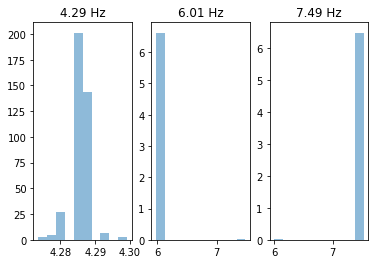

In [23]:
fig, axes = plt.subplots(ncols=3)
axes[0].hist(0.5 / np.diff(left), density=True, alpha=0.5, label='Left Freqs')
axes[0].set(title=f"{np.mean(0.5 / np.diff(left)):.2f} Hz")

axes[1].hist(0.5 / np.diff(middle), density=True, alpha=0.5, label='Middle Freqs')
axes[1].set(title=f"{np.mean(0.5 / np.diff(middle)):.2f} Hz")

axes[2].hist(0.5 / np.diff(right), density=True, alpha=0.5, label='Right Freqs');
axes[2].set(title=f"{np.mean(0.5 / np.diff(right)):.2f} Hz")
